# Importing the necessary libraries

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.metrics import classification_report

tf.random.set_seed(23)

import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')

2024-07-27 23:19:55.800448: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 23:19:55.800608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 23:19:56.081914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# !pip install tensorflow[and-cuda]
# !pip install tensorflow[and-cuda]==2.13.0 --user

# load trainn, test data

In [38]:
train_path = '/kaggle/input/project-work-dataset/split_data/train'
test_path = '/kaggle/input/project-work-dataset/split_data/test'
val_path = '/kaggle/input/project-work-dataset/split_data/val'
img_width,img_height,channel = 96,96,3

# data preprocessing

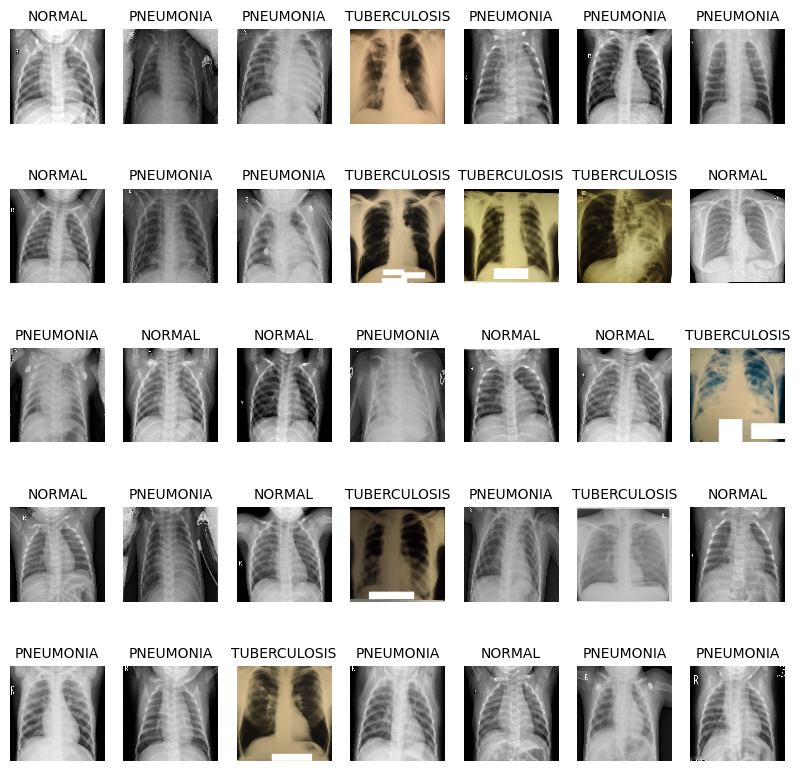

In [39]:
classes = ['PNEUMONIA','TUBERCULOSIS','NORMAL']
# we will import the train data , using this code
def import_data(dataset, path, categories):
    for i in categories:
        full_path = os.path.join(path,i)
        label = categories.index(i)
        for j in os.listdir(full_path):
            try:
                img = cv2.imread(os.path.join(full_path,j))
                img_resized = cv2.resize(img,(img_width,img_height))
                dataset.append([img_resized,label])
            except :
                pass
    random.shuffle(dataset)
    
# creating the dataset

train_df = []
import_data(train_df,train_path,classes)
train_df = pd.DataFrame(train_df,columns=['image','label'])
train_stack = np.stack(train_df.image)

# Images,
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.imshow(train_df.image[i])
    plt.title(classes[train_df.label[i]],size=10)
    plt.axis('off')

# Train dataset

In [7]:

train_df.head(5)


,image,label
0,"[[[226, 226, 226], [225, 225, 225], [223, 223,...",1
1,"[[[43, 43, 43], [44, 44, 44], [48, 48, 48], [4...",0
2,"[[[119, 119, 125], [123, 123, 129], [120, 122,...",1
3,"[[[137, 137, 137], [141, 141, 141], [147, 147,...",0
4,"[[[40, 40, 40], [49, 49, 49], [53, 53, 53], [6...",2


In [13]:
train_df.label.value_counts()

label
0    532
2    525
1    490
Name: count, dtype: int64

# Loading the pretrained models :

In [14]:

from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, InceptionV3, MobileNet, Xception, NASNetMobile
from tensorflow.keras.applications import DenseNet121, EfficientNetB0

#DenseNet121---------------------------------------------->
densenet121 = DenseNet121(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

densenet121.trainable = False

#EfficientNetB0------------------------------------------->
efficientnetB0 = EfficientNetB0(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

efficientnetB0.trainable = False

#InceptionV3---------------------------------------------->
inceptionv3 = InceptionV3(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

inceptionv3.trainable = False

#MobileNet----------------------------------------------->
mobilenet = MobileNet(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

mobilenet.trainable = False

#Xception----------------------------------------------->
xception = Xception(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

xception.trainable = False

#NASNetMobile--------------------------------------------->
nasnetmobile = NASNetMobile(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

nasnetmobile.trainable = False

#vgg16--------------------------------------------------->
vgg16 = VGG16(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg16.trainable = False

#vgg19-------------------------------------------------->
vgg19 = VGG19(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg19.trainable = False

#Resnet50----------------------------------------------->
resnet50 = ResNet50(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

resnet50.trainable = False

#Resnet101----------------------------------------------->
resnet101 = ResNet101(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

resnet101.trainable = False


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# model_1 NASNetMobile 

# let's build and train the model 

In [24]:

model_1 = Sequential()
model_1.add(nasnetmobile)
#ann layers
model_1.add(layers.Flatten())

model_1.add(layers.BatchNormalization())
model_1.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_1.add(layers.Dropout(0.2))



#no of classes is 3
model_1.add(layers.Dense(units=3,activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_1.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 7/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5467 - loss: 9.4423 

W0000 00:00:1722124242.980577      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.6945 - loss: 8.1487

W0000 00:00:1722124255.247432      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722124267.770660      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 65s 835ms/step - accuracy: 0.6963 - loss: 8.1019 - val_accuracy: 0.6935 - val_loss: 3.8603
Epoch 2/20
 5/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8026 - loss: 2.4962

W0000 00:00:1722124274.717389      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8086 - loss: 2.2056 - val_accuracy: 0.6968 - val_loss: 1.8335
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8415 - loss: 1.2653 - val_accuracy: 0.7871 - val_loss: 1.3537
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8279 - loss: 1.2132 - val_accuracy: 0.7806 - val_loss: 1.2927
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8381 - loss: 1.1793 - val_accuracy: 0.8323 - val_loss: 1.1055
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8365 - loss: 1.1248 - val_accuracy: 0.7968 - val_loss: 1.2756
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8421 - loss: 1.2485 - val_accuracy: 0.8161 - val_loss: 1.1811
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8534 - loss: 1.1464 - val_accuracy: 0.8226 - val_loss: 1.1287
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8529 - loss: 1.0375 - val_accuracy: 0.8194 - val_loss: 1.

<Axes: title={'center': 'NASNetMobile'}>

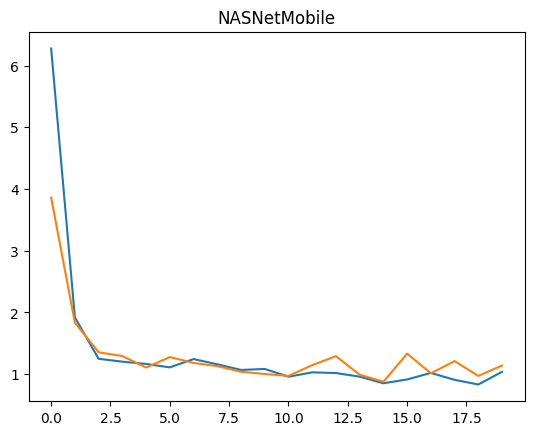

In [25]:
plt.title('NASNetMobile')
sns.lineplot(model_1.history.history['loss'])
sns.lineplot(model_1.history.history['val_loss'])

# importing some performance metrices :

In [53]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

test_df = []
import_data(test_df, test_path, classes)
test_df = pd.DataFrame(test_df,columns=['image','label'])
test_stack = np.stack(test_df.image)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9667673716012085
Precision Score : 0.9667889089667625
Recall Score : 0.9667673716012085
F1 Score : 0.966765419305495

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Confusion Matrix:
[[109   0   5]
 [  0 105   0]
 [  6   0 106]]


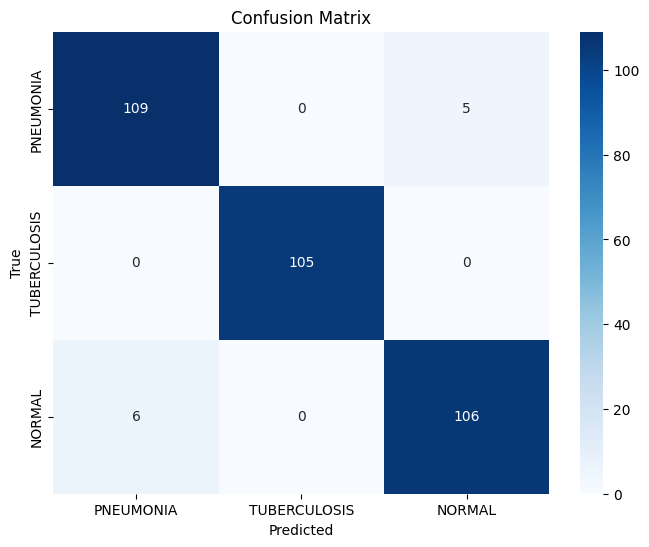

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

   PNEUMONIA       0.95      0.96      0.95       114
TUBERCULOSIS       1.00      1.00      1.00       105
      NORMAL       0.95      0.95      0.95       112

    accuracy                           0.97       331
   macro avg       0.97      0.97      0.97       331
weighted avg       0.97      0.97      0.97       331



In [56]:
model_1=model_3
def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_1, test_stack, test_df)
from sklearn.metrics import confusion_matrix

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df.label, prediction)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate classification report
report = classification_report(test_df.label, prediction, target_names=classes)

print(report)



# model_3 vgg16

In [28]:

# let's build and train the model 
model_3 = Sequential()
model_3.add(vgg16)
# ann layers
model_3.add(layers.Flatten())

model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units=128,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_3.add(layers.Dropout(0.57))

model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units=64,activation='relu'))
model_3.add(layers.Dropout(0.5))

#no of classes is 3
model_3.add(layers.Dense(units=3,activation='softmax'))

model_3.compile(optimizer=Adam(learning_rate=0.0006), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_3.fit(train_stack,train_df.label,epochs=25, validation_split = 0.2)

Epoch 1/25
 5/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4335 - loss: 11.0811

W0000 00:00:1722124438.289127      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6400 - loss: 9.3537

W0000 00:00:1722124443.085259      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722124443.962602      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.6429 - loss: 9.3194 - val_accuracy: 0.9226 - val_loss: 5.8165
Epoch 2/25
 4/39 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8470 - loss: 5.7730

W0000 00:00:1722124444.703054      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8907 - loss: 5.1940 - val_accuracy: 0.9355 - val_loss: 3.6496
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9438 - loss: 3.2771 - val_accuracy: 0.9419 - val_loss: 2.3507
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9531 - loss: 2.1086 - val_accuracy: 0.9419 - val_loss: 1.5864
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9596 - loss: 1.4081 - val_accuracy: 0.9581 - val_loss: 1.1190
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9722 - loss: 1.0197 - val_accuracy: 0.9323 - val_loss: 0.8804
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9675 - loss: 0.7642 - val_accuracy: 0.9452 - val_loss: 0.6991
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9585 - loss: 0.6575 - val_accuracy: 0.9516 - val_loss: 0.6659
Epoch 9/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9702 - loss: 0.5847 - val_accuracy: 0.9581 - val_loss: 0.

<Axes: title={'center': 'VGG16'}>

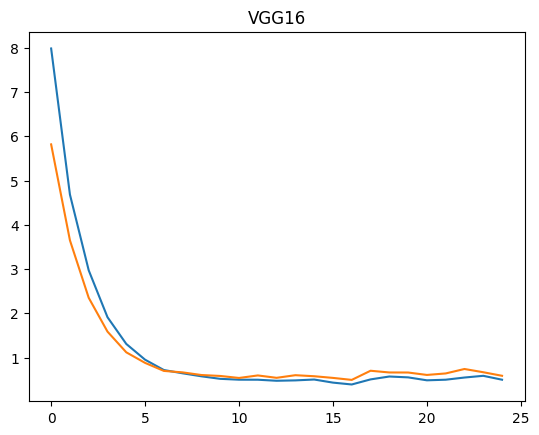

In [29]:
plt.title('VGG16')
sns.lineplot(model_3.history.history['loss'])
sns.lineplot(model_3.history.history['val_loss'])

In [44]:
# importing some performance metrices :
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

test_df = []
import_data(test_df, test_path, classes)
test_df = pd.DataFrame(test_df,columns=['image','label'])
test_stack = np.stack(test_df.image)
def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_3, test_stack, test_df)



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9667673716012085
Precision Score : 0.9667889089667625
Recall Score : 0.9667673716012085
F1 Score : 0.966765419305495



# model_4 vgg19

In [57]:

# let's build and train the model 
model_4 = Sequential()
model_4.add(vgg19)
#ann layers
model_4.add(layers.Flatten())

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_4.add(layers.Dropout(0.5))

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_4.add(layers.Dropout(0.5))

#no of classes is 3
model_4.add(layers.Dense(units=3,activation='softmax'))

model_4.compile(optimizer=Adam(learning_rate=0.0007), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_4.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 3/39 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4236 - loss: 16.2904

W0000 00:00:1722125958.129756      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6675 - loss: 13.9662

W0000 00:00:1722125962.908010      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722125963.994373      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - accuracy: 0.6703 - loss: 13.9207 - val_accuracy: 0.9161 - val_loss: 9.0746
Epoch 2/20
 5/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8775 - loss: 8.9585

W0000 00:00:1722125964.985162      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9178 - loss: 7.9538 - val_accuracy: 0.9355 - val_loss: 5.3190
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9488 - loss: 4.7353 - val_accuracy: 0.9581 - val_loss: 3.1657
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9719 - loss: 2.8386 - val_accuracy: 0.9677 - val_loss: 1.9654
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9790 - loss: 1.7551 - val_accuracy: 0.9742 - val_loss: 1.2681
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9732 - loss: 1.1525 - val_accuracy: 0.9742 - val_loss: 0.8909
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9781 - loss: 0.8186 - val_accuracy: 0.9774 - val_loss: 0.6459
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9825 - loss: 0.6059 - val_accuracy: 0.9710 - val_loss: 0.5515
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9790 - loss: 0.5089 - val_accuracy: 0.9677 - val_loss: 0.

<Axes: title={'center': 'VGG19'}>

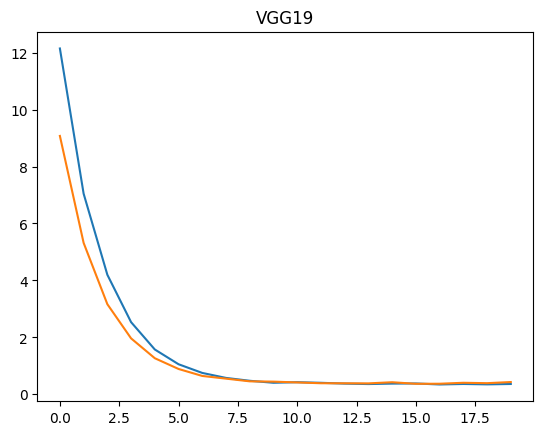

In [58]:
plt.title('VGG19')
sns.lineplot(model_4.history.history['loss'])
sns.lineplot(model_4.history.history['val_loss'])

 5/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

W0000 00:00:1722126013.716168      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9607250755287009
Precision Score : 0.9613830027251167
Recall Score : 0.9607250755287009
F1 Score : 0.9606547342359769

 4/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

W0000 00:00:1722126014.788844      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[110   1   3]
 [  0 105   0]
 [  9   0 103]]


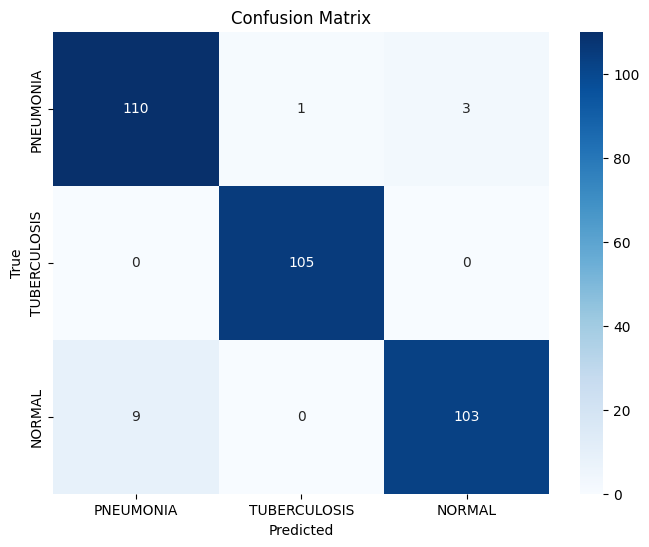

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

   PNEUMONIA       0.92      0.96      0.94       114
TUBERCULOSIS       0.99      1.00      1.00       105
      NORMAL       0.97      0.92      0.94       112

    accuracy                           0.96       331
   macro avg       0.96      0.96      0.96       331
weighted avg       0.96      0.96      0.96       331



In [59]:
model_1=model_4
def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_1, test_stack, test_df)
from sklearn.metrics import confusion_matrix

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df.label, prediction)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate classification report
report = classification_report(test_df.label, prediction, target_names=classes)

print(report)



# model_5 resnet50

In [60]:


# let's build and train the model 
model_5 = Sequential()
model_5.add(resnet50)
#ann layers
model_5.add(layers.Flatten())

model_5.add(layers.BatchNormalization())
model_5.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_5.add(layers.Dropout(0.6))


model_5.add(layers.Dense(units=3,activation='softmax'))

model_5.compile(optimizer=Adam(learning_rate=0.0006), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_5.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 422ms/step - accuracy: 0.7852 - loss: 5.4339 - val_accuracy: 0.7742 - val_loss: 5.5078
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9259 - loss: 3.5853 - val_accuracy: 0.9323 - val_loss: 2.9026
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9493 - loss: 2.6749 - val_accuracy: 0.9613 - val_loss: 2.0826
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9464 - loss: 2.0056 - val_accuracy: 0.9419 - val_loss: 1.7175
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9597 - loss: 1.5278 - val_accuracy: 0.9677 - val_loss: 1.3460
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9645 - loss: 1.2317 - val_accuracy: 0.9452 - val_loss: 1.0658
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9566 - loss: 0.9743 - val_accuracy: 0.9548 - val_loss: 0.9080
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9691 - loss: 0.8076 - val_accuracy: 0.9484 -

<Axes: title={'center': 'Resnet50'}>

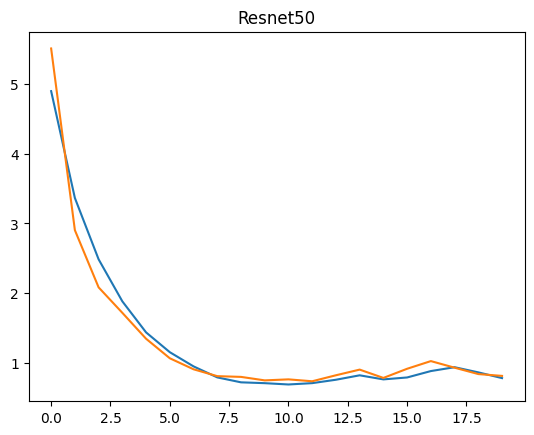

In [61]:
plt.title('Resnet50')
sns.lineplot(model_5.history.history['loss'])
sns.lineplot(model_5.history.history['val_loss'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 610ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9546827794561934
Precision Score : 0.9556091055794589
Recall Score : 0.9546827794561934
F1 Score : 0.9544702775906104

 5/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

W0000 00:00:1722126190.058763      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Confusion Matrix:
[[110   1   3]
 [  0 105   0]
 [ 10   1 101]]


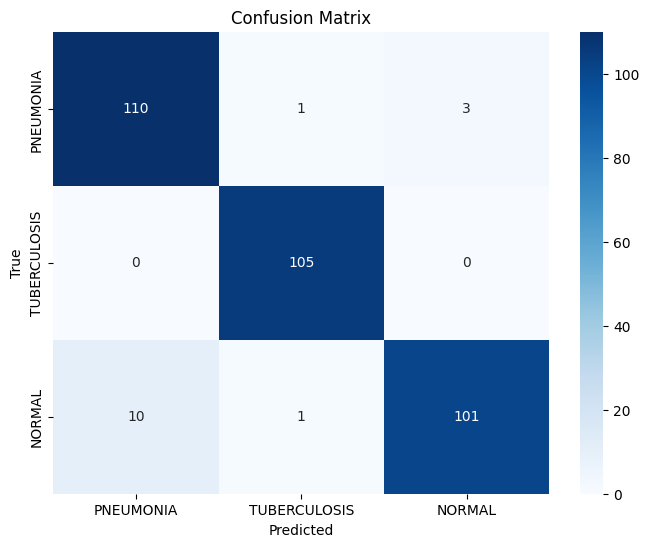

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

   PNEUMONIA       0.92      0.96      0.94       114
TUBERCULOSIS       0.98      1.00      0.99       105
      NORMAL       0.97      0.90      0.94       112

    accuracy                           0.95       331
   macro avg       0.96      0.96      0.96       331
weighted avg       0.96      0.95      0.95       331



In [64]:
model_1=model_5
def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_1, test_stack, test_df)
from sklearn.metrics import confusion_matrix

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df.label, prediction)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate classification report
report = classification_report(test_df.label, prediction, target_names=classes)

print(report)



# model_6 Resnet101

In [63]:

 
# let's build and train the model 
model_6 = Sequential()
model_6.add(resnet101)
#ann layers
model_6.add(layers.Flatten())

# model_6.add(layers.BatchNormalization())
model_6.add(layers.Dense(units=64,activation='relu'))
model_6.add(layers.Dropout(0.4))


#no of classes is 3
model_6.add(layers.Dense(units=3,activation='softmax'))

model_6.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_6.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 479ms/step - accuracy: 0.7724 - loss: 2.1158 - val_accuracy: 0.9226 - val_loss: 0.2404
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8793 - loss: 0.3025 - val_accuracy: 0.9387 - val_loss: 0.2207
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9135 - loss: 0.2636 - val_accuracy: 0.9290 - val_loss: 0.2776
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9420 - loss: 0.1832 - val_accuracy: 0.9355 - val_loss: 0.2170
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9369 - loss: 0.1926 - val_accuracy: 0.9484 - val_loss: 0.1982
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9447 - loss: 0.1427 - val_accuracy: 0.9323 - val_loss: 0.2925
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9433 - loss: 0.1668 - val_accuracy: 0.9387 - val_loss: 0.3394
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9520 - loss: 0.1657 - val_accuracy: 0.9419 -

<Axes: title={'center': 'Resnet101'}>

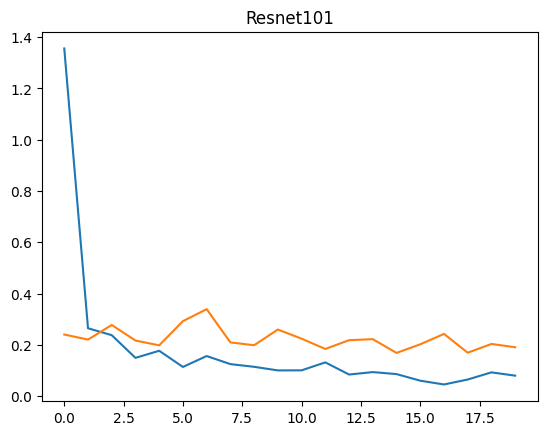

In [65]:
plt.title('Resnet101')
sns.lineplot(model_6.history.history['loss'])
sns.lineplot(model_6.history.history['val_loss'])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9577039274924471
Precision Score : 0.9592788866326581
Recall Score : 0.9577039274924471
F1 Score : 0.9577801159267093

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Confusion Matrix:
[[111   0   3]
 [  1 104   0]
 [ 10   0 102]]


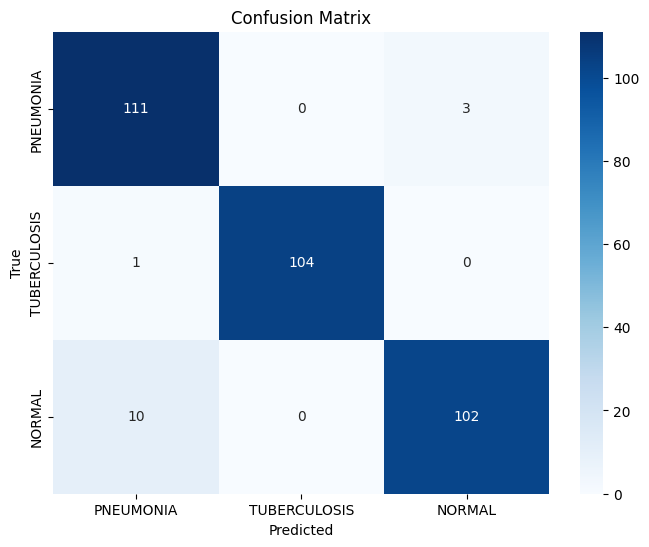

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
              precision    recall  f1-score   support

   PNEUMONIA     0.9098    0.9737    0.9407       114
TUBERCULOSIS     1.0000    0.9905    0.9952       105
      NORMAL     0.9714    0.9107    0.9401       112

    accuracy                         0.9577       331
   macro avg     0.9604    0.9583    0.9587       331
weighted avg     0.9593    0.9577    0.9578       331



In [68]:
model_1=model_6
def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_1, test_stack, test_df)
from sklearn.metrics import confusion_matrix

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df.label, prediction)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate classification report with 4 decimal places
report = classification_report(test_df.label, prediction, target_names=classes, digits=4)

print(report)



# model_7 DenseNet121


In [67]:

# let's build and train the model 
model_7 = Sequential()
model_7.add(densenet121)
#ann layers
model_7.add(layers.Flatten())

# model.add(layers.BatchNormalization())
model_7.add(layers.Dense(units=128,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_7.add(layers.Dropout(0.2))


#no of classes is 3
model_7.add(layers.Dense(units=3,activation='softmax'))

model_7.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_7.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 7/39 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4731 - loss: 19.8714

W0000 00:00:1722126283.401097      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.6956 - loss: 12.4862

W0000 00:00:1722126299.660362      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722126309.373743      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.6985 - loss: 12.3720 - val_accuracy: 0.9419 - val_loss: 3.6924
Epoch 2/20
 5/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8891 - loss: 3.9714

W0000 00:00:1722126321.639792      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9157 - loss: 3.3912 - val_accuracy: 0.9548 - val_loss: 2.4751
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9308 - loss: 2.4005 - val_accuracy: 0.9484 - val_loss: 1.9322
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9505 - loss: 1.8751 - val_accuracy: 0.9419 - val_loss: 1.6038
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9509 - loss: 1.4949 - val_accuracy: 0.9613 - val_loss: 1.2786
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9645 - loss: 1.2131 - val_accuracy: 0.9581 - val_loss: 1.0927
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9429 - loss: 1.1249 - val_accuracy: 0.9484 - val_loss: 0.9613
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9574 - loss: 0.9467 - val_accuracy: 0.9581 - val_loss: 0.8339
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9480 - loss: 0.8377 - val_accuracy: 0.9581 - val_loss: 0.

<Axes: title={'center': 'DenseNet121'}>

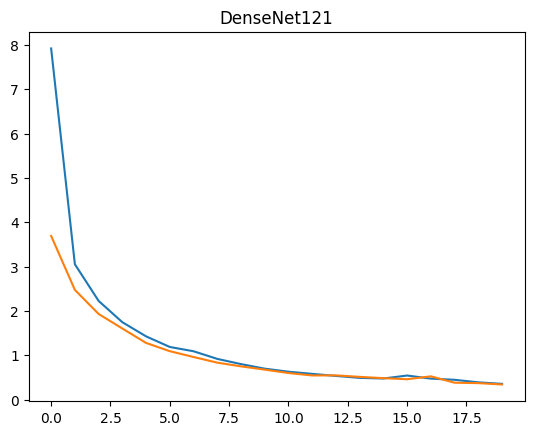

In [69]:
plt.title('DenseNet121')
sns.lineplot(model_7.history.history['loss'])
sns.lineplot(model_7.history.history['val_loss'])

# model_1=model_7

 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

W0000 00:00:1722126460.701671      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9546827794561934
Precision Score : 0.9552809444990493
Recall Score : 0.9546827794561934
F1 Score : 0.9546694683490565

 3/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

W0000 00:00:1722126477.115109      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[104   0  10]
 [  0 105   0]
 [  5   0 107]]


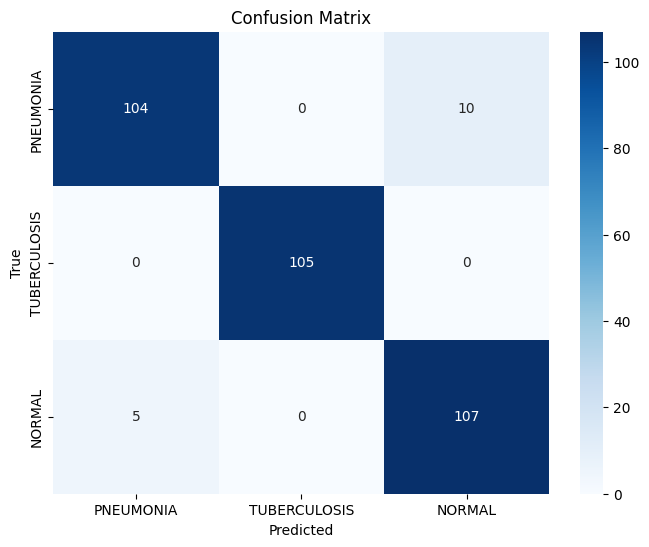

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

   PNEUMONIA     0.9541    0.9123    0.9327       114
TUBERCULOSIS     1.0000    1.0000    1.0000       105
      NORMAL     0.9145    0.9554    0.9345       112

    accuracy                         0.9547       331
   macro avg     0.9562    0.9559    0.9557       331
weighted avg     0.9553    0.9547    0.9547       331



In [70]:

def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_1, test_stack, test_df)
from sklearn.metrics import confusion_matrix

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df.label, prediction)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate classification report with 4 decimal places
report = classification_report(test_df.label, prediction, target_names=classes, digits=4)

print(report)



# model_9 InceptionV3

In [71]:


# let's build and train the model 
model_9 = Sequential()
model_9.add(inceptionv3)
#ann layers
model_9.add(layers.Flatten())

model_9.add(layers.BatchNormalization())
model_9.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_9.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=64,activation='relu'))
# model.add(layers.Dropout(0.5))

#no of classes is 3
model_9.add(layers.Dense(units=3,activation='softmax'))

model_9.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_9.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 7/39 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5232 - loss: 10.9802

W0000 00:00:1722126527.663841      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6767 - loss: 9.5583

W0000 00:00:1722126538.373567      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722126544.398418      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 43s 637ms/step - accuracy: 0.6786 - loss: 9.5278 - val_accuracy: 0.7903 - val_loss: 6.9943
Epoch 2/20
 5/39 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8683 - loss: 5.9189

W0000 00:00:1722126551.861141      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8633 - loss: 5.4139 - val_accuracy: 0.7226 - val_loss: 4.7963
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8670 - loss: 3.4198 - val_accuracy: 0.8194 - val_loss: 2.6804
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8835 - loss: 2.1957 - val_accuracy: 0.8516 - val_loss: 1.8563
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8973 - loss: 1.5139 - val_accuracy: 0.8806 - val_loss: 1.2619
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8885 - loss: 1.1177 - val_accuracy: 0.8710 - val_loss: 1.0568
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8911 - loss: 0.9093 - val_accuracy: 0.8710 - val_loss: 0.9018
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8643 - loss: 0.8144 - val_accuracy: 0.8871 - val_loss: 0.7707
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8681 - loss: 0.6973 - val_accuracy: 0.8806 - val_loss: 0.

<Axes: title={'center': 'InceptionV3'}>

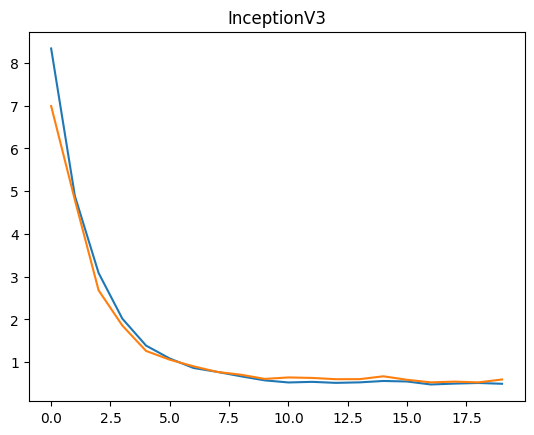

In [72]:
plt.title('InceptionV3')
sns.lineplot(model_9.history.history['loss'])
sns.lineplot(model_9.history.history['val_loss'])

 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

W0000 00:00:1722127161.640014      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 925ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.8882175226586103
Precision Score : 0.8880088895832127
Recall Score : 0.8882175226586103
F1 Score : 0.8879165170882426

 4/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

W0000 00:00:1722127170.893515      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Confusion Matrix:
[[97  5 12]
 [ 6 98  1]
 [ 7  6 99]]


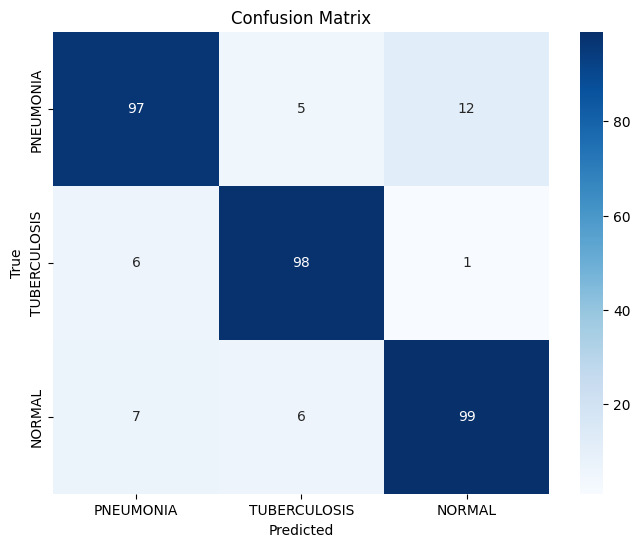

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

   PNEUMONIA     0.8818    0.8509    0.8661       114
TUBERCULOSIS     0.8991    0.9333    0.9159       105
      NORMAL     0.8839    0.8839    0.8839       112

    accuracy                         0.8882       331
   macro avg     0.8883    0.8894    0.8886       331
weighted avg     0.8880    0.8882    0.8879       331



In [73]:
model_1=model_9
def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_1, test_stack, test_df)
from sklearn.metrics import confusion_matrix

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df.label, prediction)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate classification report with 4 decimal places
report = classification_report(test_df.label, prediction, target_names=classes, digits=4)

print(report)



# model_10 MobileNet

In [74]:


# let's build and train the model 
model_10 = Sequential()
model_10.add(mobilenet)
#ann layers
model_10.add(layers.Flatten())

# model.add(layers.BatchNormalization())
model_10.add(layers.Dense(units=128,activation='relu'))
model_10.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=64,activation='relu'))
# model.add(layers.Dropout(0.5))

#no of classes is 3
model_10.add(layers.Dense(units=3,activation='softmax'))

model_10.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_10.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
25/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6118 - loss: 2.8256

W0000 00:00:1722127186.819933      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6658 - loss: 2.3147

W0000 00:00:1722127190.693773      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722127192.628741      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - accuracy: 0.6688 - loss: 2.2871 - val_accuracy: 0.9355 - val_loss: 0.1901
Epoch 2/20
25/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8890 - loss: 0.2600

W0000 00:00:1722127194.890877      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8901 - loss: 0.2656 - val_accuracy: 0.9323 - val_loss: 0.1659
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9313 - loss: 0.1989 - val_accuracy: 0.9419 - val_loss: 0.1247
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9324 - loss: 0.1806 - val_accuracy: 0.9419 - val_loss: 0.1248
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9319 - loss: 0.1686 - val_accuracy: 0.9419 - val_loss: 0.1295
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9483 - loss: 0.1427 - val_accuracy: 0.9387 - val_loss: 0.1324
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9552 - loss: 0.1233 - val_accuracy: 0.9484 - val_loss: 0.1189
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9489 - loss: 0.1262 - val_accuracy: 0.9419 - val_loss: 0.1281
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9487 - loss: 0.1317 - val_accuracy: 0.9387 - val_loss: 0.1221
Epo

<Axes: title={'center': 'MobileNet'}>

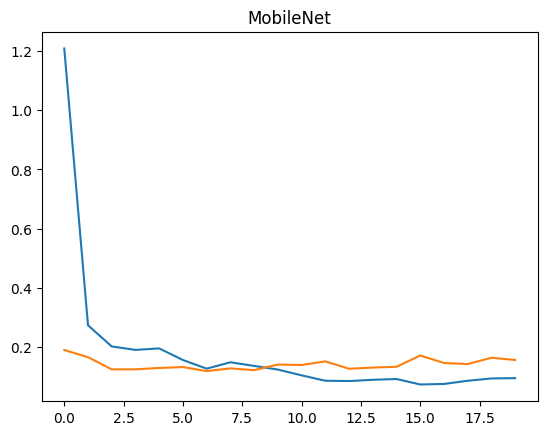

In [75]:
plt.title('MobileNet')
sns.lineplot(model_10.history.history['loss'])
sns.lineplot(model_10.history.history['val_loss'])

 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

W0000 00:00:1722127219.343438      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9607250755287009
Precision Score : 0.9607024439230741
Recall Score : 0.9607250755287009
F1 Score : 0.9606232878766534

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


W0000 00:00:1722127222.040249      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Confusion Matrix:
[[109   0   5]
 [  0 105   0]
 [  7   1 104]]


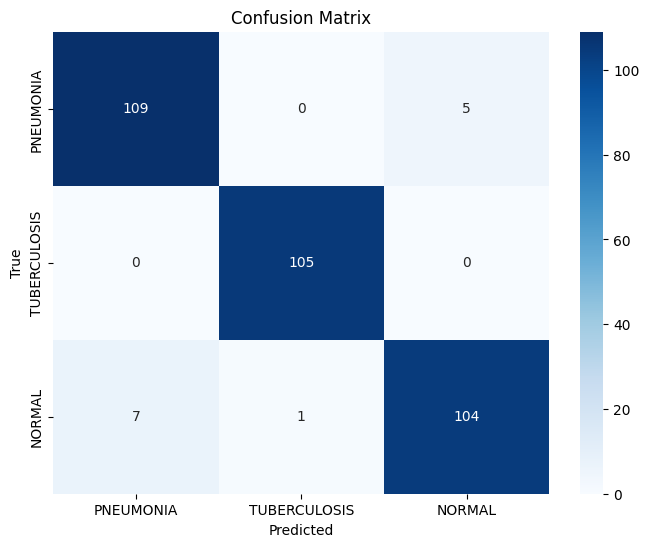

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

   PNEUMONIA     0.9397    0.9561    0.9478       114
TUBERCULOSIS     0.9906    1.0000    0.9953       105
      NORMAL     0.9541    0.9286    0.9412       112

    accuracy                         0.9607       331
   macro avg     0.9614    0.9616    0.9614       331
weighted avg     0.9607    0.9607    0.9606       331



In [76]:
model_1=model_10
def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_1, test_stack, test_df)
from sklearn.metrics import confusion_matrix

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df.label, prediction)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate classification report with 4 decimal places
report = classification_report(test_df.label, prediction, target_names=classes, digits=4)

print(report)



# model_11 Xception

In [77]:


# let's build and train the model 
model_11 = Sequential()
model_11.add(xception)
#ann layers
model_11.add(layers.Flatten())

model_11.add(layers.BatchNormalization())
model_11.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_11.add(layers.Dropout(0.3))

# model.add(layers.BatchNormalization())
model_11.add(layers.Dense(units=128,activation='relu'))
model_11.add(layers.Dropout(0.3))

#no of classes is 3
model_11.add(layers.Dense(units=3,activation='softmax'))

model_11.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_11.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/39 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5441 - loss: 10.6503

W0000 00:00:1722127243.170654      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6999 - loss: 8.3719

W0000 00:00:1722127254.922661      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 429ms/step - accuracy: 0.7014 - loss: 8.3348 - val_accuracy: 0.8258 - val_loss: 5.6102
Epoch 2/20
 7/39 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8027 - loss: 5.2630

W0000 00:00:1722127259.491545      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8225 - loss: 4.6202 - val_accuracy: 0.8806 - val_loss: 3.2251
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8539 - loss: 2.9390 - val_accuracy: 0.8806 - val_loss: 2.3404
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8676 - loss: 2.3276 - val_accuracy: 0.8484 - val_loss: 2.1142
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8712 - loss: 1.9116 - val_accuracy: 0.9097 - val_loss: 1.4140
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8592 - loss: 1.6448 - val_accuracy: 0.8774 - val_loss: 1.5553
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8756 - loss: 1.6743 - val_accuracy: 0.9065 - val_loss: 1.3887
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8839 - loss: 1.4268 - val_accuracy: 0.8806 - val_loss: 1.2211
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8984 - loss: 1.2783 - val_accuracy: 0.9000 - val_loss: 1.

<Axes: title={'center': 'Xception'}>

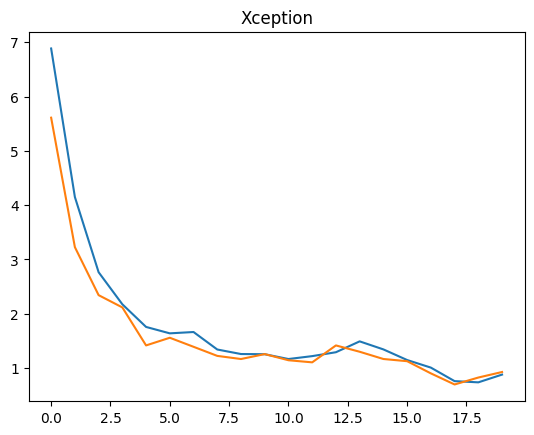

In [78]:
plt.title('Xception')
sns.lineplot(model_11.history.history['loss'])
sns.lineplot(model_11.history.history['val_loss'])

 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

W0000 00:00:1722127300.029419      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 501ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9214501510574018
Precision Score : 0.9216963691592571
Recall Score : 0.9214501510574018
F1 Score : 0.9212245048656034

 4/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

W0000 00:00:1722127305.042457      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Confusion Matrix:
[[100   2  12]
 [  4 101   0]
 [  4   4 104]]


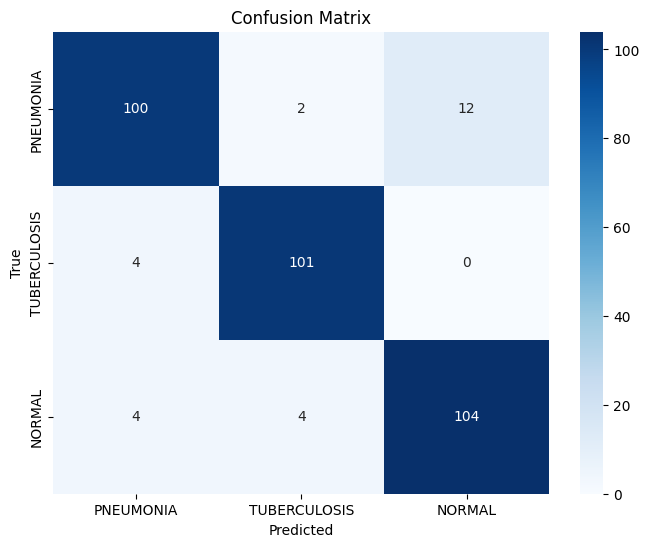

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
              precision    recall  f1-score   support

   PNEUMONIA     0.9259    0.8772    0.9009       114
TUBERCULOSIS     0.9439    0.9619    0.9528       105
      NORMAL     0.8966    0.9286    0.9123       112

    accuracy                         0.9215       331
   macro avg     0.9221    0.9226    0.9220       331
weighted avg     0.9217    0.9215    0.9212       331



In [79]:
model_1=model_11
def prediction(model, test_stack, test_df):
    ''' Evaluate the model on the test data '''
    
    # Make predictions
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    
    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - VGG16')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction)}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted")}')
    print()

# Assuming model_3 is your VGG16 model
prediction(model_1, test_stack, test_df)
from sklearn.metrics import confusion_matrix

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df.label, prediction)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming predictions are already generated
output = model_1.predict(test_stack)
prediction = [np.argmax(i) for i in output]

# Generate classification report with 4 decimal places
report = classification_report(test_df.label, prediction, target_names=classes, digits=4)

print(report)

